# Тема “Обучение без учителя”

# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [22]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


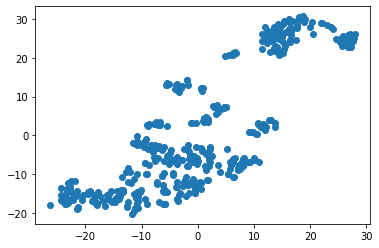

In [24]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

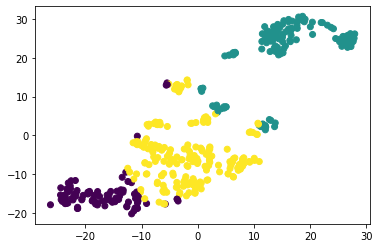

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [32]:
print('Cредняя цена(train_cluster_1): ', y_train[labels_train == 0].mean())
print('Cредний уровень преступности(train_cluster_1): ', X_train.loc[labels_train == 0, 'CRIM'].mean())

Cредняя цена(train_cluster_1):  27.78837209302326
Cредний уровень преступности(train_cluster_1):  0.07356558139534886


In [33]:
print('Cредняя цена(train_cluster_2): ', y_train[labels_train == 1].mean())
print('Cредний уровень преступности(train_cluster_2): ', X_train.loc[labels_train == 1, 'CRIM'].mean())

Cредняя цена(train_cluster_2):  16.165354330708663
Cредний уровень преступности(train_cluster_2):  10.797028425196853


In [34]:
print('Cредняя цена(train_cluster_3): ', y_train[labels_train == 2].mean())
print('Cредний уровень преступности(train_cluster_3): ', X_train.loc[labels_train == 2, 'CRIM'].mean())

Cредняя цена(train_cluster_3):  24.958115183246072
Cредний уровень преступности(train_cluster_3):  0.42166020942408367


#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [41]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [42]:
print('Cредняя цена(test_cluster_1): ', y_test[labels_test == 0].mean())
print('Cредний уровень преступности(test_cluster_1): ', X_test.loc[labels_test == 0, 'CRIM'].mean())

Cредняя цена(test_cluster_1):  33.871428571428574
Cредний уровень преступности(test_cluster_1):  0.08618571428571427


In [43]:
print('Cредняя цена(test_cluster_2): ', y_test[labels_test == 1].mean())
print('Cредний уровень преступности(test_cluster_2): ', X_test.loc[labels_test == 1, 'CRIM'].mean())

Cредняя цена(test_cluster_2):  21.552830188679245
Cредний уровень преступности(test_cluster_2):  0.25200716981132076


In [44]:
print('Cредняя цена(test_cluster_3): ', y_test[labels_test == 2].mean())
print('Cредний уровень преступности(test_cluster_3): ', X_test.loc[labels_test == 2, 'CRIM'].mean())

Cредняя цена(test_cluster_3):  16.43714285714286
Cредний уровень преступности(test_cluster_3):  10.165531142857143
